In [1]:
import scipy.io
import librosa
import numpy as np

In [2]:
def batch_gen(filenames, n_features=8320, batch_size=30):
    n = 0
    batch = np.zeros((batch_size, n_features))
    for i, f in enumerate(filenames, start=1):
        i = i % 30
        arr = np.load(f)
        batch[i-1] = arr
        if i % batch_size == 0:
            yield batch, batch
            batch = np.zeros((batch_size, n_features))

In [5]:
import glob
from sklearn.model_selection import train_test_split
files = list(glob.glob('/home/dante_gates/repos/music-rec/data/train/*.npy'))
train, test = train_test_split(files, test_size=0.2)

In [6]:
train[:10], test[:10]

(['/home/dante_gates/repos/music-rec/data/train/12 Myxom.wav - sample 2.npy',
  '/home/dante_gates/repos/music-rec/data/train/05 Shado.wav - sample 2.npy',
  '/home/dante_gates/repos/music-rec/data/train/06 My Ch.wav - sample 18.npy',
  '/home/dante_gates/repos/music-rec/data/train/tightrop.wav - sample 18.npy',
  '/home/dante_gates/repos/music-rec/data/train/07 Invok.wav - sample 7.npy',
  '/home/dante_gates/repos/music-rec/data/train/10 Storm.wav - sample 2.npy',
  '/home/dante_gates/repos/music-rec/data/train/06 Stars.wav - sample 9.npy',
  '/home/dante_gates/repos/music-rec/data/train/10 Cheye.wav - sample 5.npy',
  '/home/dante_gates/repos/music-rec/data/train/14 Track.wav - sample 10.npy',
  '/home/dante_gates/repos/music-rec/data/train/13 Track.wav - sample 9.npy'],
 ['/home/dante_gates/repos/music-rec/data/train/16 We Wi.wav - sample 1.npy',
  '/home/dante_gates/repos/music-rec/data/train/13 Red H.wav - sample 19.npy',
  '/home/dante_gates/repos/music-rec/data/train/08 Magnu.wa

In [7]:
print(len(train), len(test))
print(int(len(train) / 30))

3568 892
118


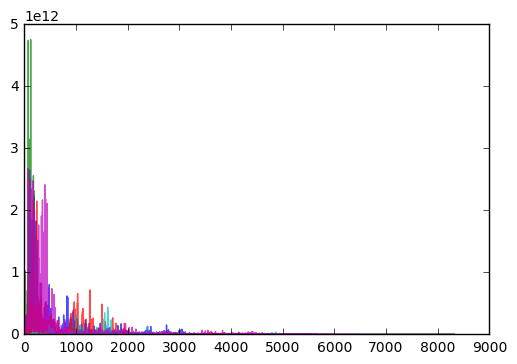

In [22]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
ax = plt.gca()
for f in train[:5]:
    ax.plot(np.load(f), alpha=0.7)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

input_length = 8320

ae = Sequential([
        Dense(2**13, input_shape=(input_length,)),
        Activation('relu'),
        Dense(2**11),
        Activation('relu'),
        Dense(2**9),
        Activation('relu'),
        Dense(2**8),
        Activation('sigmoid'),
        Dense(2**9),
        Activation('relu'),
        Dense(2**11),
        Activation('relu'),
        Dense(2**13),
        Activation('relu'),
        Dense(input_length),
    ])

In [29]:
ae.compile(optimizer='adadelta', loss='binary_crossentropy')

In [30]:
from functools import partial
def repeat_generator(g):
    while 1:
        for item in g():
            yield item
train_gen = repeat_generator(partial(batch_gen, train))
test_gen = repeat_generator(partial(batch_gen, test))

In [33]:
batch_size = 250
epochs = 100
train_size = len(train)
test_size = len(test)

train_steps = int(train_size / batch_size)
val_steps = int(test_size / batch_size)
ae.fit_generator(train_gen, train_steps, validation_data=test_gen,
                        validation_steps=val_steps, epochs=epochs)

Epoch 1/100


KeyboardInterrupt: 